<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Deep Learning</center>
# Challenge S4: Redes Neuronales Convolucionales en Keras (CNNs) para Fashion MNIST

## Objetivos

El objetivo de este challenge es crear una CNN profunda capaz de distinguir entre números las prendas de ropa de Fashion MNIST, y evaluar su comportamiento mediante el análisis de sus curvas de rendimiento.

## Punto de partida

El punto de partida se corresponde con el código que hemos visto en el worksheet, añadiendo una variable "history" para guardar la salida del histórico del entrenamiento, y poder analizar su comportamiento después:

In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

import keras
# Import Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:10000]
Y_valid = train_labels[:10000]

X_train = train_images[10000:]
Y_train = train_labels[10000:]

X_test = test_images
Y_test = test_labels

n_classes = len(np.unique(Y_train))

# Reshape input to [width, height, #channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_valid = np_utils.to_categorical(Y_valid, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=128, epochs=5, 
          verbose=1, validation_data=[X_valid, Y_valid])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 s

## Tareas

Vamos a comenzar incrementando la profundidad de nuestro modelo, y continuaremos con el análisis del rendimiento de cada arquitectura: 

### Añadir una segunda capa convolucional

A partir del código anterior, realizar las modificaciones necesarias para añadir una segunda capa convolucional con 32 filtros, de tamaño 3x3 y función de activación relu.
A continuación, añadiremos también una capa max_pooling con un kernel de tamaño 2x2 y un paso de 2.

NOTA: Guarda el histórico del entrenamiento en una variable "history2" para no sobreescribir la anterior y poder evaluar ambos modelos sin tener que volver a repetir su ejecución.


In [2]:
import numpy as np
np.random.seed(123)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

import keras
# Import Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:10000]
Y_valid = train_labels[:10000]

X_train = train_images[10000:]
Y_train = train_labels[10000:]

X_test = test_images
Y_test = test_labels

n_classes = len(np.unique(Y_train))

# Reshape input to [width, height, #channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_valid = np_utils.to_categorical(Y_valid, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

## 
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
##
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history2 = model.fit(X_train, Y_train, batch_size=128, epochs=5, 
          verbose=1, validation_data=[X_valid, Y_valid])

score2 = model.evaluate(X_test, Y_test, verbose=0)
print(score2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

¿Ha mejorado el resultado? ¿Por qué?

El resultado ha mejorado al introducir una nueva capa de convolución que permite obtener más features y tener una mejor clasificación.

¿Ha incrementado el tamaño del modelo? ¿Por qué?

El tamaño del modelo ha disminuido ya que con más capas el modelo en este caso es más eficiente porque con menos parámetros es capaz de alcanzar mejores resultados


### Visualización del entrenamiento

Otra de las utilidades que nos ofrece Keras es la posibilidad de acceder al histórico del entrenamiento de un modelo para poder ver las curvas de entrenamiento.

Para acceder a este histórico, tan sólo tenemos que guardar la salida de la llamada a model.fit.

El código de una función para imprimir las curvas de aprendizaje por pantalla se muestra a continuación.

Ejecútalo y contesta las preguntas de la siguiente celda para el primer modelo y el segundo (una o dos capas convolucionales +  maxpooling).


In [3]:
############## Si al ejecutar el Kernel se bloquea, 
############## utiliza estas líneas para permitir la 
############## duplicación de librerías
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
##############

import matplotlib.pyplot as plt

def plotCurves(history,epochs):

    plt.figure(0)
    plt.plot(history.history['acc'],'r')
    plt.plot(history.history['val_acc'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
 
 
    plt.figure(1)
    plt.plot(history.history['loss'],'r')
    plt.plot(history.history['val_loss'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
 
 
    plt.show()
    
plotCurves(history,5)

<Figure size 640x480 with 1 Axes>

<Figure size 800x600 with 1 Axes>

¿Te parecen buenas curvas de aprendizaje?

¿Te parece que incrementando el número de iteraciones, el rendimiento mejoraría?

En este caso los resultados no son óptimos por nivel de función de coste y accuracy. Se puede observar una mejora con el aumento del númmero de iteraciones.

Analiza ahora las curvas para el segundo modelo, y contesta a las mismas preguntas pero para "history2":


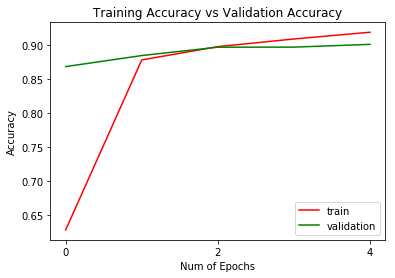

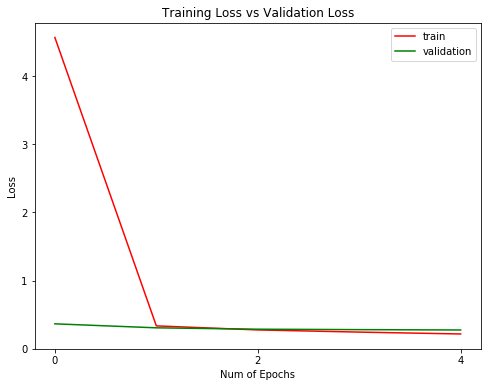

In [4]:
plotCurves(history2,5)

En este caso los resultados mejoran estando en un punto de convergencia con 3 epochs, graccias a la introducción de ReLu como  función de activación. En este caso, no parece conveniente aumentar las iteraciones ya que el resultado no muestra mejora sustancial. 